In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

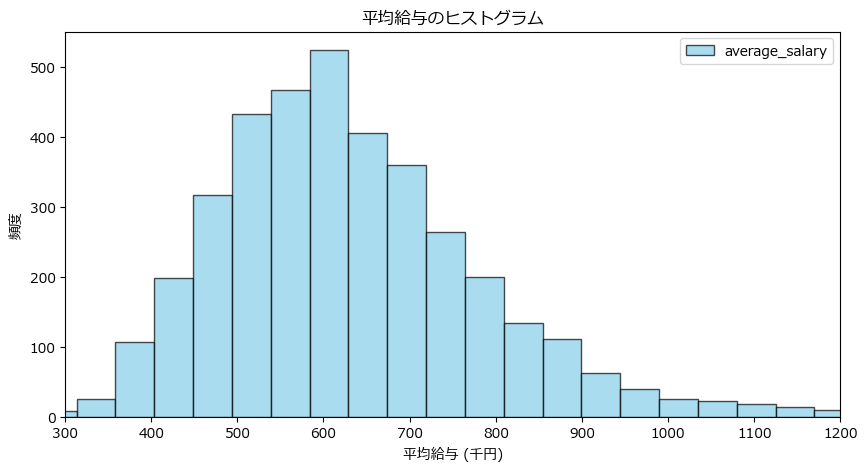

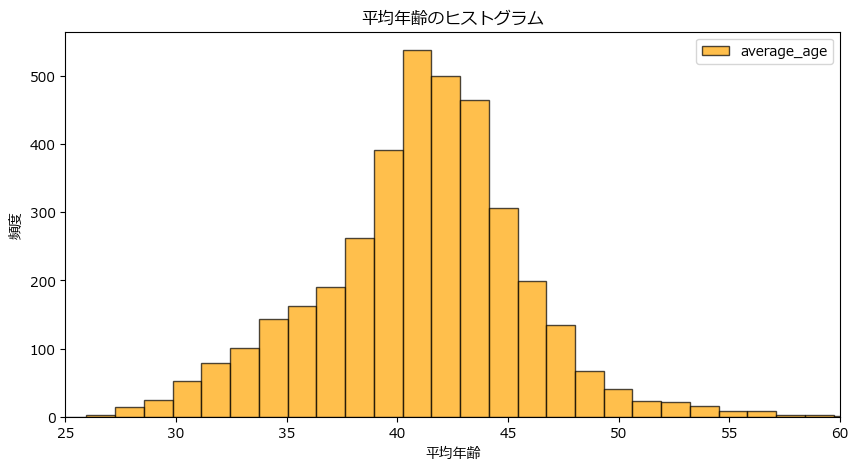

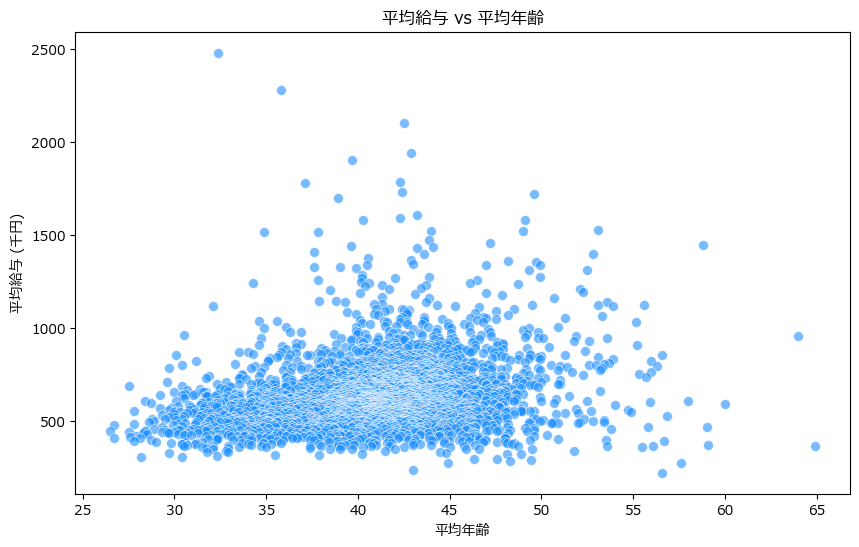

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

# データの読み込み
file_path = r'C:\Users\100ca\Documents\PyCode\IR\data\IR-TS.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# データを給与で降順に並べ替え
df = df.sort_values(by="average_salary", ascending=False)

# '情報なし'や'---'などのデータをNaNに変換
df.replace({'情報なし': None, '---': None}, inplace=True)

# 数値データの列をfloat型に変換
numerical_cols = ['average_salary', 'average_age']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ヒストグラムの描画（給与）
plt.figure(figsize=(10, 5))
plt.hist(df['average_salary'].dropna(), bins=50, alpha=0.7, label='average_salary', color='skyblue', edgecolor='black')
plt.title('平均給与のヒストグラム')
plt.xlabel('平均給与 (千円)')
plt.ylabel('頻度')
plt.xlim([300, 1200])  # average_salaryの範囲制限
plt.legend(loc='upper right')
plt.show()

# ヒストグラムの描画（年齢）
plt.figure(figsize=(10, 5))
plt.hist(df['average_age'].dropna(), bins=50, alpha=0.7, label='average_age', color='orange', edgecolor='black')
plt.title('平均年齢のヒストグラム')
plt.xlabel('平均年齢')
plt.ylabel('頻度')
plt.xlim([25, 60])  # average_ageの範囲制限
plt.legend(loc='upper right')
plt.show()

# 散布図の描画
plt.figure(figsize=(10, 6))
sns.scatterplot(y='average_salary', x='average_age', data=df, alpha=0.6, color='dodgerblue', s=50)
plt.title('平均給与 vs 平均年齢')
plt.ylabel('平均給与 (千円)')
plt.xlabel('平均年齢')
plt.show()


c:\Users\100ca\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\100ca\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


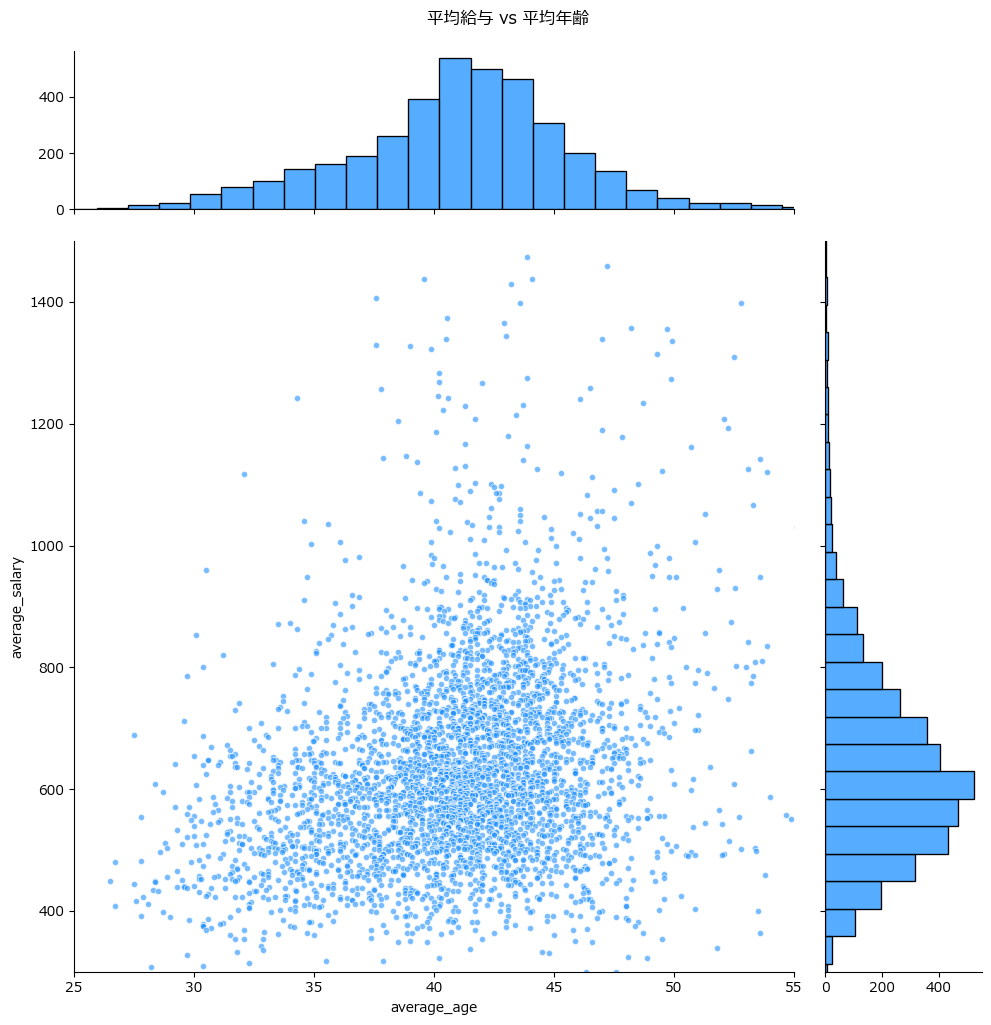

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

# データの読み込み
file_path = r'C:\Users\100ca\Documents\PyCode\IR\data\IR-TS.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# データを給与で降順に並べ替え
df = df.sort_values(by="average_salary", ascending=False)

# '情報なし'や'---'などのデータをNaNに変換
df.replace({'情報なし': None, '---': None}, inplace=True)

# 数値データの列をfloat型に変換
numerical_cols = ['average_salary', 'average_age']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 散布図とヒストグラムの描画
sns.jointplot(x='average_age', y='average_salary', data=df, kind='scatter', height=10, ratio=4, marginal_ticks=True, 
              color='dodgerblue', marginal_kws=dict(bins=50, fill=True), s=20, edgecolor='w', linewidth=0.7, alpha=0.6)

# プロットのタイトル
plt.suptitle('平均給与 vs 平均年齢', y=1.02)
plt.xlim([25, 55])
plt.ylim([300, 1500])
plt.show()

# 注釈を追加する点の数を減らす
sampled_df = df.head(100)

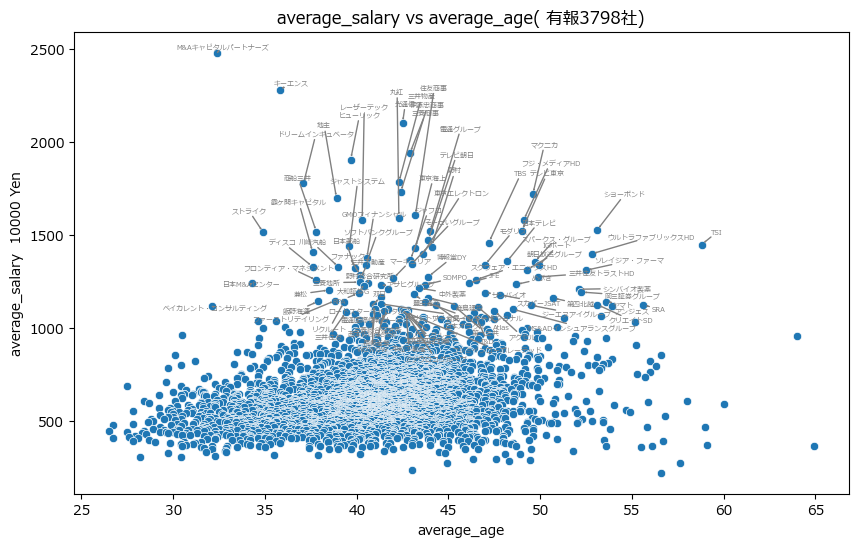

In [57]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(y='average_salary', x='average_age', data=df)#.head(1000))
plt.title('average_salary vs average_age( 有報3798社)')
plt.ylabel('average_salary  10000 Yen')
plt.xlabel('average_age')


sampled_df = df.head(100)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text( point['average_age'],point['average_salary'] ,  str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整する
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))
plt.show()


In [58]:
df['salary/age']=df['average_salary']**2/df['average_age']
df=df.sort_values(by='salary/age',ascending=False)
df

,ticker,company_name,average_salary,average_age,salary/age
1959,6080,M&Aキャピタルパートナーズ,2478.0,32.40,189521.111111
2418,6861,キーエンス,2279.0,35.80,145079.357542
3594,9435,光通信,2101.0,42.50,103863.552941
519,3003,ヒューリック,1904.0,39.67,91384.320645
3097,8058,三菱商事,1939.0,42.90,87639.184149
...,...,...,...,...,...
3454,9161,ID&E,NaN,NaN,NaN
3509,9267,Genky,NaN,NaN,NaN
3539,9332,NISSO,NaN,NaN,NaN
3551,9347,日本管財,NaN,NaN,NaN


C:\Users\100ca\AppData\Local\Temp\ipykernel_25060\3101621026.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(y='average_salary', x='average_age', data=df.head(300),  palette='warm')#hue='salary/age',


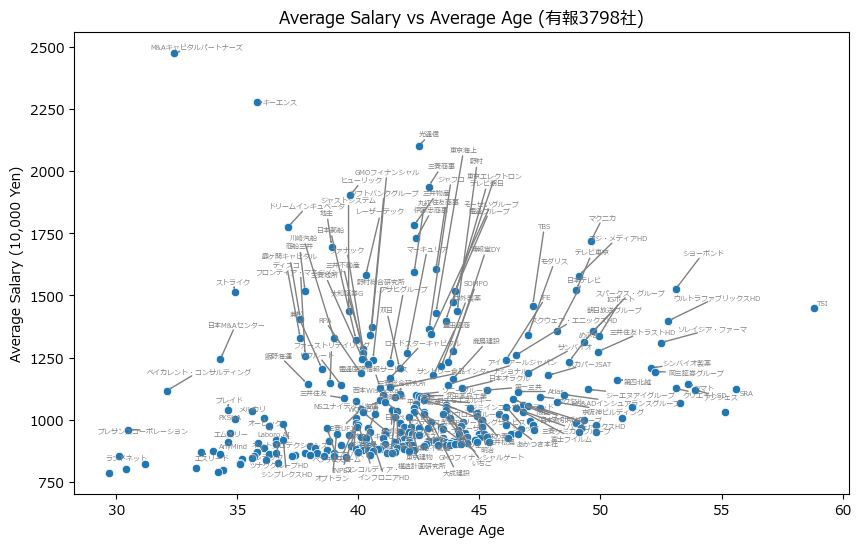

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 6))

# 'salary/age'の値に基づいて色を付ける
scatter = sns.scatterplot(y='average_salary', x='average_age', data=df.head(300),  palette='warm')#hue='salary/age',
plt.title('Average Salary vs Average Age (有報3798社)')
plt.ylabel('Average Salary (10,000 Yen)')
plt.xlabel('Average Age')

# 注釈のためにサンプルを取得
sampled_df = df.head(150)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text(point['average_age'], point['average_salary'], str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


# 業種別


In [60]:
# 'ticker' 列を新しいインデックスとして設定
df = df.set_index('ticker').dropna(subset='average_salary')

# 結果を確認
df

,company_name,average_salary,average_age,salary/age
ticker,,,,
6080,M&Aキャピタルパートナーズ,2478.0,32.40,189521.111111
6861,キーエンス,2279.0,35.80,145079.357542
9435,光通信,2101.0,42.50,103863.552941
3003,ヒューリック,1904.0,39.67,91384.320645
8058,三菱商事,1939.0,42.90,87639.184149
...,...,...,...,...
5592,くすりの窓口,430.0,NaN,NaN
9160,ノバレーゼ,419.0,NaN,NaN
5891,魁力屋,418.0,NaN,NaN


In [61]:
import pandas as pd

# ファイルパス（Windowsのパスの場合は、生の文字列を使用する）
url = r'C:\Users\100ca\Documents\PyCode\IR\data\data_j.csv'

# CSVファイルを読み込む
tosho = pd.read_csv(url).set_index('コード')[['銘柄名', '市場・商品区分', '33業種区分', 
       '17業種区分']]

# 結果を確認
tosho


,銘柄名,市場・商品区分,33業種区分,17業種区分
コード,,,,
1301,極洋,プライム（内国株式）,水産・農林業,食品
1332,ニッスイ,プライム（内国株式）,水産・農林業,食品
1333,マルハニチロ,プライム（内国株式）,水産・農林業,食品
1375,雪国まいたけ,プライム（内国株式）,水産・農林業,食品
1376,カネコ種苗,スタンダード（内国株式）,水産・農林業,食品
...,...,...,...,...
9993,ヤマザワ,スタンダード（内国株式）,小売業,小売
9994,やまや,スタンダード（内国株式）,小売業,小売
9995,グローセル,プライム（内国株式）,卸売業,商社・卸売


In [62]:
result_df = pd.concat([df, tosho],axis=1)
result_df

,company_name,average_salary,average_age,salary/age,銘柄名,市場・商品区分,33業種区分,17業種区分
6080,M&Aキャピタルパートナーズ,2478.0,32.40,189521.111111,Ｍ＆Ａキャピタルパートナーズ,プライム（内国株式）,サービス業,情報通信・サービスその他
6861,キーエンス,2279.0,35.80,145079.357542,キーエンス,プライム（内国株式）,電気機器,電機・精密
9435,光通信,2101.0,42.50,103863.552941,光通信,プライム（内国株式）,情報・通信業,情報通信・サービスその他
3003,ヒューリック,1904.0,39.67,91384.320645,ヒューリック,プライム（内国株式）,不動産業,不動産
8058,三菱商事,1939.0,42.90,87639.184149,三菱商事,プライム（内国株式）,卸売業,商社・卸売
...,...,...,...,...,...,...,...,...
9161,NaN,NaN,NaN,NaN,ＩＤ＆Ｅホールディングス,プライム（内国株式）,サービス業,情報通信・サービスその他
9267,NaN,NaN,NaN,NaN,Ｇｅｎｋｙ ＤｒｕｇＳｔｏｒｅｓ,プライム（内国株式）,小売業,小売
9332,NaN,NaN,NaN,NaN,ＮＩＳＳＯホールディングス,プライム（内国株式）,サービス業,情報通信・サービスその他
9347,NaN,NaN,NaN,NaN,日本管財ホールディングス,プライム（内国株式）,サービス業,情報通信・サービスその他


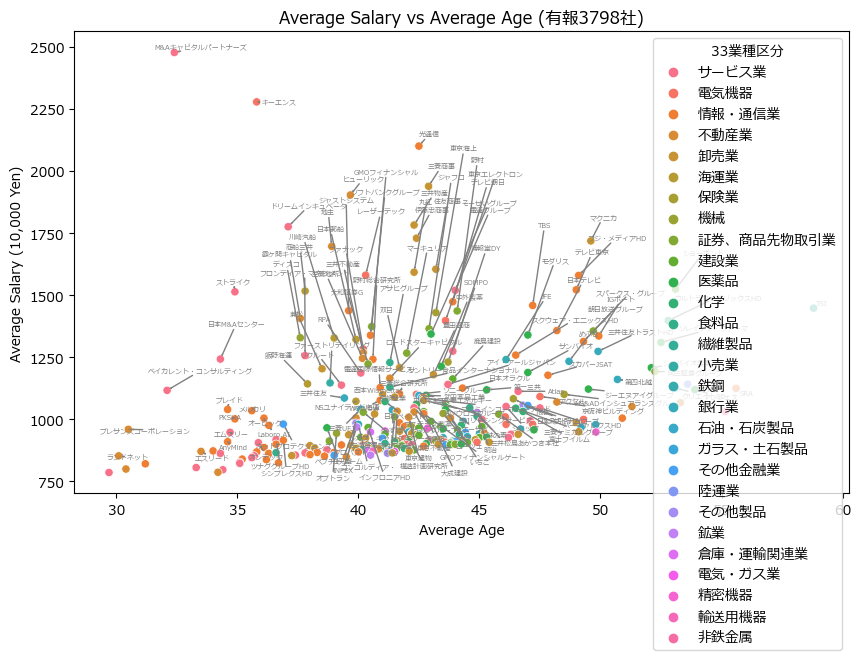

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 6))

# 'salary/age'の値に基づいて色を付ける
scatter = sns.scatterplot(y='average_salary', x='average_age', data=result_df.head(300),hue='33業種区分')
plt.title('Average Salary vs Average Age (有報3798社)')
plt.ylabel('Average Salary (10,000 Yen)')
plt.xlabel('Average Age')

# 注釈のためにサンプルを取得
sampled_df = df.head(150)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text(point['average_age'], point['average_salary'], str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


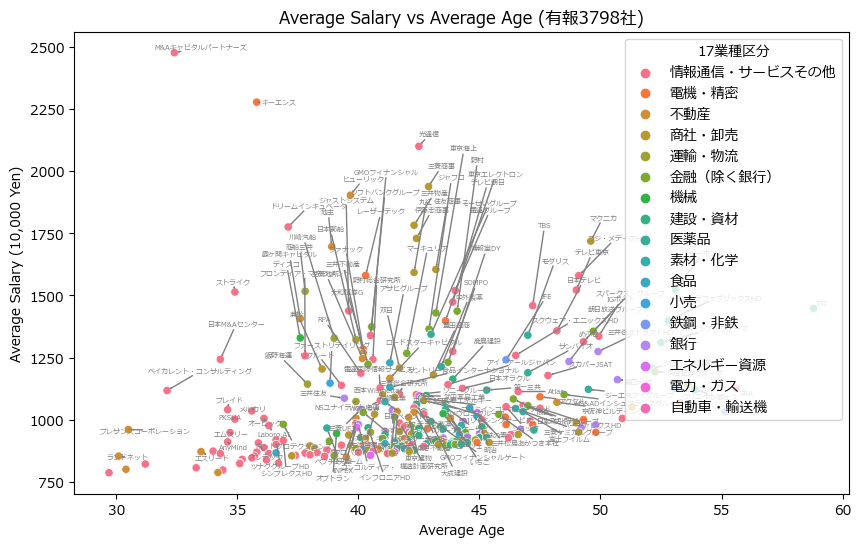

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 6))

# 'salary/age'の値に基づいて色を付ける
scatter = sns.scatterplot(y='average_salary', x='average_age', data=result_df.head(300),hue='17業種区分')
plt.title('Average Salary vs Average Age (有報3798社)')
plt.ylabel('Average Salary (10,000 Yen)')
plt.xlabel('Average Age')

# 注釈のためにサンプルを取得
sampled_df = df.head(150)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text(point['average_age'], point['average_salary'], str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


In [83]:
# '市場・商品区分' 列のユニークな値の出現回数をカウント
display( result_df['市場・商品区分'].value_counts() )


display( result_df['かふか4分類'].value_counts() )


display( result_df['33業種区分'].value_counts() )

市場・商品区分
プライム（内国株式）      1658
スタンダード（内国株式）    1614
グロース（内国株式）       560
Name: count, dtype: int64

かふか4分類
サービス         1755
製造           1426
テクノロジー        598
基礎インフラ＆資源      53
Name: count, dtype: int64

33業種区分
情報・通信業        598
サービス業         533
小売業           342
卸売業           301
電気機器          238
機械            222
化学            211
建設業           153
不動産業          142
食料品           126
その他製品         106
輸送用機器          89
金属製品           88
銀行業            79
医薬品            76
陸運業            60
ガラス・土石製品       54
繊維製品           49
精密機器           49
鉄鋼             42
証券、商品先物取引業     42
その他金融業         37
倉庫・運輸関連業       36
非鉄金属           34
電気・ガス業         25
パルプ・紙          24
ゴム製品           18
保険業            13
水産・農林業         12
海運業            11
石油・石炭製品        10
鉱業              6
空運業             6
Name: count, dtype: int64

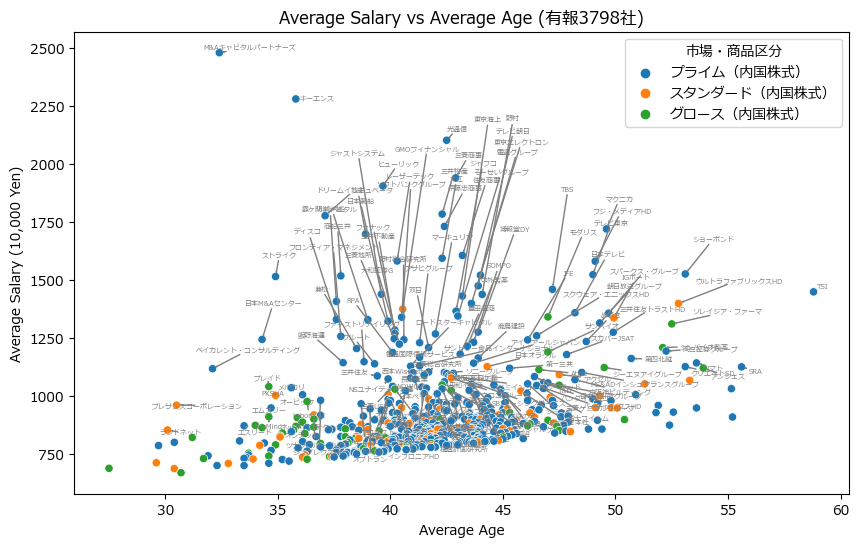

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 6))

# 'salary/age'の値に基づいて色を付ける
scatter = sns.scatterplot(y='average_salary', x='average_age', data=result_df.head(600),hue='市場・商品区分')
plt.title('Average Salary vs Average Age (有報3798社)')
plt.ylabel('Average Salary (10,000 Yen)')
plt.xlabel('Average Age')

# 注釈のためにサンプルを取得
sampled_df = df.head(150)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text(point['average_age'], point['average_salary'], str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


In [68]:
# 業種区分と新しいカテゴリのマッピング
industry_mapping = {
    '情報通信・サービスその他': 'テクノロジー＆サービス',
    '電機・精密': 'テクノロジー＆サービス',
    '不動産': '金融＆不動産',
    '商社・卸売': '産業＆建設',
    '運輸・物流': '産業＆建設',
    '金融（除く銀行）': '金融＆不動産',
    '機械': '産業＆建設',
    '建設・資材': '産業＆建設',
    '医薬品': 'ヘルスケア＆消費財',
    '素材・化学': '産業＆建設',
    '食品': 'ヘルスケア＆消費財',
    '小売': 'ヘルスケア＆消費財',
    '鉄鋼・非鉄': '産業＆建設',
    '銀行': '金融＆不動産',
    'エネルギー資源': 'エネルギー＆資源',
    '電力・ガス': 'エネルギー＆資源',
    '自動車・輸送機': 'テクノロジー＆サービス'
}

# '17業種区分' 列を使用して新しいカテゴリ列を追加
result_df['かふか5分類'] = result_df['17業種区分'].map(industry_mapping)

# 結果を確認
print(result_df[['17業種区分', 'かふか5分類']].head())


            17業種区分       かふか5分類
6080  情報通信・サービスその他  テクノロジー＆サービス
6861         電機・精密  テクノロジー＆サービス
9435  情報通信・サービスその他  テクノロジー＆サービス
3003           不動産       金融＆不動産
8058         商社・卸売        産業＆建設


In [74]:
# 33業種区分と新しいカテゴリのマッピング
industry_mapping = {
    'サービス業': 'サービス',
    '電気機器': '製造',
    '情報・通信業': 'テクノロジー',
    '不動産業': 'サービス',
    '卸売業': 'サービス',
    '海運業': 'サービス',
    '保険業': 'サービス',
    '機械': '製造',
    '証券、商品先物取引業': 'サービス',
    '建設業': 'サービス',
    '医薬品': '製造',
    '化学': '製造',
    '食料品': '製造',
    '繊維製品': '製造',
    '小売業': 'サービス',
    '鉄鋼': '製造',
    '銀行業': 'サービス',
    '石油・石炭製品': '基礎インフラ＆資源',
    'ガラス・土石製品': '製造',
    'その他金融業': 'サービス',
    '陸運業': 'サービス',
    'その他製品': '製造',
    '鉱業': '基礎インフラ＆資源',
    '倉庫・運輸関連業': 'サービス',
    '電気・ガス業': '基礎インフラ＆資源',
    '精密機器': '製造',
    '輸送用機器': '製造',
    '非鉄金属': '製造',
    '金属製品': '製造',
    '空運業': 'サービス',
    'パルプ・紙': '製造',
    '水産・農林業': '基礎インフラ＆資源',
    'ゴム製品': '製造'
}

# '33業種区分' 列を使用して新しいカテゴリ列を追加
result_df['かふか4分類'] = result_df['33業種区分'].map(industry_mapping)

# 結果を確認
print(result_df[['33業種区分', 'かふか4分類']].head())


      33業種区分  かふか4分類
6080   サービス業    サービス
6861    電気機器      製造
9435  情報・通信業  テクノロジー
3003    不動産業    サービス
8058     卸売業    サービス


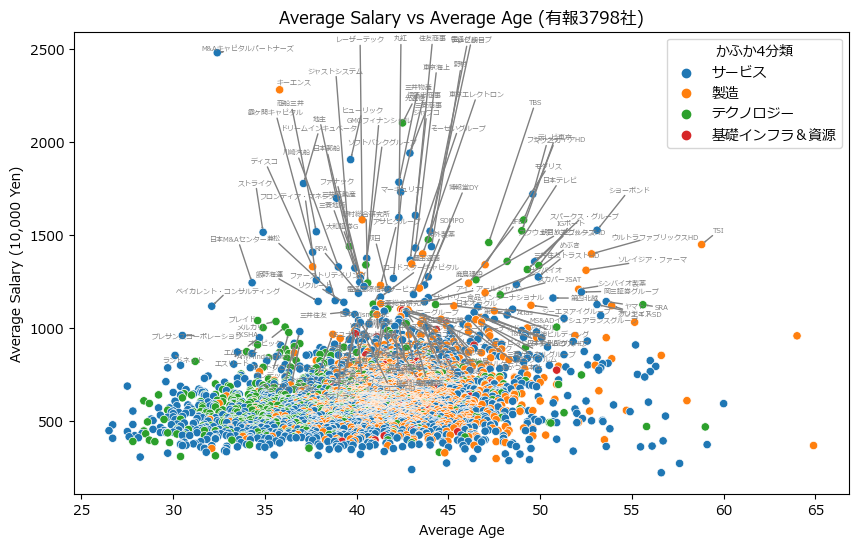

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

plt.figure(figsize=(10, 6))

# 'salary/age'の値に基づいて色を付ける
scatter = sns.scatterplot(y='average_salary', x='average_age', data=result_df.head(5000),hue='かふか4分類')
plt.title('Average Salary vs Average Age (有報3798社)')
plt.ylabel('Average Salary (10,000 Yen)')
plt.xlabel('Average Age')

# 注釈のためにサンプルを取得
sampled_df = df.head(150)

texts = []
for i, point in sampled_df.iterrows():
    if pd.notnull(point['average_salary']) and pd.notnull(point['average_age']):
        text = plt.text(point['average_age'], point['average_salary'], str(point['company_name']),
                        fontdict=dict(color='grey', size=5))
        texts.append(text)

# adjust_textのパラメータを調整
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


In [84]:
result_df.to_csv(fr'C:\Users\100ca\Documents\PyCode\IR\data\IR-TS_concat.csv')